<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/Superviviencia_cancer_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

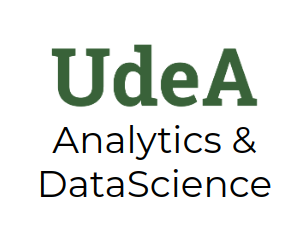

In [11]:
Image("local/imgs/udea-datascience.png")

### **Titulo:**


1. Análisis de supervivencia del cáncer de mama utilizando modelos de aprendizaje automático con datos clínicos y perfiles de expresión génica

2 Analisis de Supervivencia del Cancer de mama utilizando Modelos de clasificacion
3. Prediccion de supervivencia del cancer de mama utilizando modelos de aprendizaje automático
4. Predicción de Supervivencia del Cancer de mama utilizando Modelos de clasificacion

# 1) **Contexto del Problema**

La mayoría de nosotros conoce a alguien que luchó contra el cáncer de mama, o al menos escuchó sobre las luchas que enfrentan los pacientes que luchan contra el cáncer de mama. El cáncer de mama es el cáncer más frecuente entre las mujeres y afecta a 2,1 millones de mujeres cada año. El cáncer de mama causa el mayor número de muertes relacionadas con el cáncer entre las mujeres. Solo en 2018, se estima que 627.000 mujeres murieron de cáncer de mama.

La parte más importante de un proceso de toma de decisiones clínicas en pacientes con cáncer, en general, es la estimación precisa del pronóstico y la duración de la supervivencia. Las pacientes con cáncer de mama con la misma etapa de la enfermedad y las mismas características clínicas pueden tener diferentes respuestas al tratamiento y supervivencia general, pero ¿por qué?

Los cánceres están asociados con anomalías genéticas. La expresión genética mide el nivel de actividad genética en un tejido y proporciona información sobre sus actividades complejas. La comparación de los genes expresados ​​en tejido normal y enfermo puede aportar una mejor comprensión del pronóstico y los resultados del cáncer. El uso de técnicas de aprendizaje automático en datos genéticos tiene el potencial de proporcionar la estimación correcta del tiempo de supervivencia y puede evitar procedimientos quirúrgicos y de tratamiento innecesarios.

Objetivo:

*Predecir la supervivencia del cáncer de mama utilizando modelos de aprendizaje automático con datos clínicos y perfiles de expresión génica.
Agrupación de genes*

https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2) Descripción de los Datos**

La base de datos del Consorcio Internacional de Taxonomía Molecular del Cáncer de Mama (METABRIC) es un proyecto de Canadá-Reino Unido que contiene datos de  de 1.980 muestras de cáncer de mama primario. Los datos clínicos y genómicos se descargaron de cBioPortal.

El conjunto de datos fue recopilado por el profesor Carlos Caldas del Cambridge Research Institute y el profesor Sam Aparicio del British Columbia Cancer Center en Canadá y publicado en Nature Communications (Pereira et al., 2016). También apareció en varios artículos, incluidos Nature y otros:

* Associations between genomic stratification of breast cancer and centrally reviewed tumor pathology in the METABRIC cohort
https://www.nature.com/articles/s41523-018-0056-8

* Predicting Outcomes of Hormone and Chemotherapy in the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) Study by Biochemically-inspired Machine Learning https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461908/

Atributos clínicos en el conjunto de datos:

## **A) Importar Base de Datos**

In [13]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

In [14]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/METABRIC_RNA_Mutation.csv'
df=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
print(df.shape)

(1904, 693)


In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [17]:
df.head(2)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,...,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,shank2_mut,ep300_mut,ptprd_mut,usp9x_mut,setd2_mut,setd1a_mut,thsd7a_mut,afdn_mut,erbb3_mut,rb1_mut,myo1a_mut,alk_mut,fanca_mut,adgra2_mut,ubr5_mut,pik3r1_mut,myo3a_mut,asxl2_mut,apc_mut,ctcf_mut,asxl1_mut,fancd2_mut,taf1_mut,kdm6a_mut,ctnna3_mut,brca1_mut,ptprm_mut,foxo3_mut,usp28_mut,gldc_mut,brca2_mut,cacna2d3_mut,arid2_mut,aff2_mut,lifr_mut,sbno1_mut,kdm3a_mut,ncoa3_mut,bap1_mut,l1cam_mut,pbrm1_mut,chd1_mut,jak1_mut,setdb1_mut,fam20c_mut,arid5b_mut,egfr_mut,map3k10_mut,smarcc2_mut,erbb4_mut,npnt_mut,nek1_mut,agmo_mut,zfp36l1_mut,smad4_mut,sik1_mut,casp8_mut,prkcq_mut,smarcc1_mut,palld_mut,dcaf4l2_mut,bcas3_mut,cdkn1b_mut,gps2_mut,men1_mut,stk11_mut,sik2_mut,ptpn22_mut,brip1_mut,flt3_mut,nrg3_mut,fbxw7_mut,ttyh1_mut,taf4b_mut,or6a2_mut,map3k13_mut,hdac9_mut,prkacg_mut,rpgr_mut,large1_mut,foxp1_mut,clk3_mut,prkcz_mut,lipi_mut,ppp2r2a_mut,prkce_mut,gh1_mut,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mta

In [18]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

## **B) Diccionario de Variables**

* patient_id: ID del paciente
* ageatdiagnosis:Edad de la paciente al momento del diagnóstico. 
* typeofbreast_surgery:Tipo de cirugía de cáncer de mama: 1- MASTECTOMÍA, que se refiere a una cirugía para extirpar todo el tejido mamario de una mama como una forma de tratar o prevenir el cáncer de mama. 2- CONSERVADORA DE MAMA, que se refiere a una urgencia donde solo la parte de la mama que tiene cancer se remueve
* cancer_type: Tipos de cáncer de mama: 1- Cáncer de mama o 2- Sarcoma de mama
* cancertypedetailed: Tipos detallados de cáncer de mama: 1- Carcinoma ductal invasivo de mama 2- Carcinoma ductal y lobulillar mixto de mama 3- Carcinoma lobular invasivo de mama 4- Carcinoma mucinoso mixto invasivo de mama 5- Cáncer de mama metaplásico
* cellularity: Celularidad del cáncer después de la quimioterapia, que se refiere a la cantidad de células tumorales en la muestra y su disposición en grupos.
* chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no)
* pam50+claudin-low_subtype: Pam 50: es una prueba de perfil tumoral que ayuda a mostrar si es probable que algunos cánceres de mama con receptores de estrógeno positivos (ER positivos) y HER2 negativos hagan metástasis (cuando el cáncer de mama se disemina a otros órganos). El subtipo de cáncer de mama con claudina baja se define por las características de expresión génica, principalmente: baja expresión de genes de adhesión célula-célula, alta expresión de genes de transición epitelial-mesenquimatosa (EMT) y patrones de expresión génica similares a células madre / menos diferenciados
* cohort: La cohorte es un grupo de sujetos que comparten una característica definitoria (toma un valor de 1 a 5)
* erstatusmeasuredbyihc: Para evaluar si los receptores de estrógeno se expresan en las células cancerosas mediante el uso de inmunohistoquímica (un tinte utilizado en patología que se dirige a un antígeno específico, si está allí, dará un color, no está allí, el tejido del portaobjetos se coloreará ) (positivo negativo)
* er_status: Las células cancerosas son positivas o negativas para los receptores de estrógeno
* neoplasmhistologicgrade: Determinado por patología al observar la naturaleza de las células, se ven agresivas o no (toma un valor de 1 a 3)
* her2statusmeasuredbysnp6: Evaluar si el cáncer es positivo para HER2 o no mediante el uso de técnicas moleculares avanzadas (tipo de secuenciación de próxima generación)
* her2_status: Si el cáncer es positivo o negativo para HER2
* tumorotherhistologic_subtype: Tipo de cáncer basado en el examen microscópico del tejido canceroso (toma un valor de 'Ductal / NST', 'Mixto', 'Lobular', 'Tubular / cribiforme', 'Mucinoso', 'Medular', 'Otro', 'Metaplástico')
* hormone_therapy: Si la paciente tuvo tratamiento hormonal o no (sí / no)
* inferredmenopausalstate: Si la paciente es posmenopáusica o no (post / pre)
* integrative_cluster: Subtipo molecular del cáncer basado en alguna expresión genética (toma un valor de '4ER +', '3', '9', '7', '4ER-', '5', '8', '10', ' 1 ',' 2 ',' 6 ')
* primarytumorlaterality: Ya sea que involucre el seno derecho o el izquierdo
* lymphnodesexamined_positive: Para tomar muestras del ganglio linfático durante la cirugía y ver si estaba involucrado por el cáncer.
* mutation_count: Número de gen que tiene mutaciones relevantes
* nottinghamprognosticindex: Se utiliza para determinar el pronóstico después de una cirugía por cáncer de mama. Su valor se calcula utilizando tres criterios patológicos: el tamaño del tumor; el número de ganglios linfáticos afectados; y el grado del tumor.
* oncotree_code: OncoTree es una ontología de código abierto que se desarrolló en el Memorial Sloan Kettering Cancer Center (MSK) para estandarizar el diagnóstico de tipos de cáncer desde una perspectiva clínica al asignar a cada diagnóstico un código OncoTree único.
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte
* **overall_survival: Variable objetivo si el paciente está vivo o muerto**.
* pr_status: Las células cancerosas son positivas o negativas para los receptores de progesterona
* radio_therapy: Si el paciente recibió radio como tratamiento (sí / no)
* 3-geneclassifiersubtype: Subtipo de clasificador de tres genes Toma un valor de 'ER- / HER2-', 'ER + / HER2- High Prolif', nan, 'ER + / HER2- Low Prolif', 'HER2 +'
* tumor_size: Tamaño del tumor medido por técnicas de imagen.
* Etapa del cáncer según la participación de las estructuras circundantes, los ganglios linfáticos y la diseminación a distancia
* deathfromcancer:Si la muerte del paciente se debió a cáncer o no (sí / no)

Atributos genéticos en el conjunto de datos:
La parte genética del conjunto de datos contiene la puntuación z de los niveles de ARNm para 331 genes y la mutación para 175 genes.

Desde CBioPortal:

¿Qué son los ARNm?
Las moléculas de ADN unidas a cada portaobjetos actúan como sondas para detectar la expresión génica, que también se conoce como transcriptoma o el conjunto de transcripciones de ARN mensajero (ARNm) expresadas por un grupo de genes. Para realizar un análisis de microarrays, las moléculas de ARNm se recolectan típicamente tanto de una muestra experimental como de una muestra de referencia.

¿Qué son las puntuaciones Z de ARNm?
Para los datos de expresión de ARNm, se realizan los cálculos de la expresión relativa de un gen individual y un tumor a la distribución de expresión del gen en una población de referencia. Esa población de referencia son todas las muestras del estudio. El valor devuelto indica el número de desviaciones estándar de la media de expresión en la población de referencia (puntuación Z). Esta medida es útil para determinar si un gen está regulado hacia arriba o hacia abajo en relación con las muestras normales o con todas las demás muestras tumorales.

The formula is :

z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample

In [19]:
df=df.iloc[:,0:31]
df.head(2)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living


**Se selecciona los Pacientes Vivos y fallecidos donde la Causa de muerte sea Cancer**

In [20]:
df["death_from_cancer"].value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

In [21]:
df=df[df["death_from_cancer"]!="Died of Other Causes"]

In [22]:
print(len(df))

1424


In [23]:
df["death_from_cancer"].value_counts()

Living             801
Died of Disease    622
Name: death_from_cancer, dtype: int64

In [24]:
df["overall_survival"].value_counts()

1    801
0    623
Name: overall_survival, dtype: int64

**Se elimina la Variable patient_id**

In [25]:
## Eliminar ID
df=df.drop(["patient_id"],axis=1)

## **C) Revision Datos Nulos**

In [26]:
Variables=df.columns.to_list()
print(f'Total Variables : {len(Variables)}')

Total Variables : 30


In [27]:
#Calculo del porcentaje de nulos
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df[i].isnull().sum())
  TipoVariable.append(df[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos
28,tumor_stage,343,float64,24.087079
26,3-gene_classifier_subtype,149,object,10.463483
17,primary_tumor_laterality,80,object,5.617978
4,cellularity,42,object,2.949438
19,mutation_count,39,float64,2.738764
10,neoplasm_histologic_grade,38,float64,2.668539
8,er_status_measured_by_ihc,20,object,1.404494
1,type_of_breast_surgery,16,object,1.123596
27,tumor_size,12,float64,0.842697
3,cancer_type_detailed,10,object,0.702247


### **Técnicas para el tratamiento de valores faltantes**

Existen multitud de procedimientos para aplicar cuando tenemos valores perdidos. Aunque básicamente existen dos aproximaciones posibles:

* Eliminar muestras o variables que tienen datos faltantes.
* Imputar los valores perdidos, es decir, sustituirlos por estimaciones.

#### **Imputación**

Las técnicas de imputación son procedimientos que estiman el valor del dato faltante. Por lo tanto, al tratarse de una estimación no se debe abusar de ellas.

##### **Sustitución para variables tipo Numérica**

El método de sustitución por la media, como es de esperar, solo se puede aplicar sobre variables que sean de tipo numérico. Existen otras alternativas como sustituir por la mediana.

###### **Imputamos mutation_count y tumor_size**

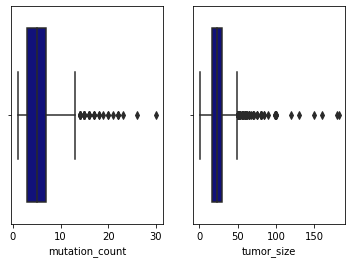

In [28]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x=df.mutation_count,color="darkblue", ax=axs[0])
sns.boxplot(x=df.tumor_size,color="darkblue", ax=axs[1])
plt.show()

Vemos que las dos variables presentan datos atipicos, por lo tanto se decide Imputar los valores nulos por medio de la Mediana, ya que es menos sensible a datos atipicos

In [29]:
df.mutation_count=df.mutation_count.replace(np.nan,df.mutation_count.median())
df.tumor_size=df.tumor_size.replace(np.nan,df.tumor_size.median())

##### **Sustitución para variables tipo Categórica**

El método de sustitución por la moda es usada para variables tipo factor, es el valor que más se repite

###### **Imputacion para la Variable Categoricas**

* tumor_stage
* 3-gene_classifier_subtype
* primary_tumor_laterality
* cellularity
* er_status_measured_by_ihc
* neoplasm_histologic_grade
* cancer_type_detailed
* tumor_other_histologic_subtype

In [30]:
print(df.tumor_stage.value_counts())
moda=stats.mode(df.tumor_stage)
print(f'La moda es : {moda[0][0]}')
df.tumor_stage=df.tumor_stage.replace(np.nan,moda[0][0])

2.0    604
1.0    369
3.0     96
4.0      9
0.0      3
Name: tumor_stage, dtype: int64
La moda es : 2.0


In [31]:
print(df["3-gene_classifier_subtype"].value_counts())
moda=stats.mode(df["3-gene_classifier_subtype"])
df["3-gene_classifier_subtype"]=df["3-gene_classifier_subtype"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

ER+/HER2- High Prolif    433
ER+/HER2- Low Prolif     433
ER-/HER2-                242
HER2+                    167
Name: 3-gene_classifier_subtype, dtype: int64
La moda es : ER+/HER2- High Prolif


In [32]:
print(df["primary_tumor_laterality"].value_counts())
moda=stats.mode(df["primary_tumor_laterality"])
df["primary_tumor_laterality"]=df["primary_tumor_laterality"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Left     693
Right    651
Name: primary_tumor_laterality, dtype: int64
La moda es : Left


In [33]:
print(df["primary_tumor_laterality"].value_counts())
moda=stats.mode(df["primary_tumor_laterality"])
df["primary_tumor_laterality"]=df["primary_tumor_laterality"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Left     773
Right    651
Name: primary_tumor_laterality, dtype: int64
La moda es : Left


In [34]:
print(df["cellularity"].value_counts())
moda=stats.mode(df["cellularity"])
df["cellularity"]=df["cellularity"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

High        706
Moderate    525
Low         151
Name: cellularity, dtype: int64
La moda es : High


In [35]:
print(df["neoplasm_histologic_grade"].value_counts())
moda=stats.mode(df["neoplasm_histologic_grade"])
df["neoplasm_histologic_grade"]=df["neoplasm_histologic_grade"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

3.0    735
2.0    536
1.0    115
Name: neoplasm_histologic_grade, dtype: int64
La moda es : 3.0


In [36]:
print(df["er_status_measured_by_ihc"].value_counts())
moda=stats.mode(df["er_status_measured_by_ihc"])
df["er_status_measured_by_ihc"]=df["er_status_measured_by_ihc"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Positve     1035
Negative     369
Name: er_status_measured_by_ihc, dtype: int64
La moda es : Positve


In [37]:
print(df["type_of_breast_surgery"].value_counts())
moda=stats.mode(df["type_of_breast_surgery"])
df["type_of_breast_surgery"]=df["type_of_breast_surgery"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

MASTECTOMY           806
BREAST CONSERVING    602
Name: type_of_breast_surgery, dtype: int64
La moda es : MASTECTOMY


In [38]:
print(df["cancer_type_detailed"].value_counts())
moda=stats.mode(df["cancer_type_detailed"])
df["cancer_type_detailed"]=df["cancer_type_detailed"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Breast Invasive Ductal Carcinoma             1137
Breast Mixed Ductal and Lobular Carcinoma     141
Breast Invasive Lobular Carcinoma             104
Breast Invasive Mixed Mucinous Carcinoma       17
Breast                                         15
Name: cancer_type_detailed, dtype: int64
La moda es : Breast Invasive Ductal Carcinoma


In [39]:
print(df["tumor_other_histologic_subtype"].value_counts())
moda=stats.mode(df["tumor_other_histologic_subtype"])
df["tumor_other_histologic_subtype"]=df["tumor_other_histologic_subtype"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Ductal/NST             1101
Mixed                   141
Lobular                 104
Medullary                20
Mucinous                 17
Tubular/ cribriform      16
Other                    15
Name: tumor_other_histologic_subtype, dtype: int64
La moda es : Ductal/NST


In [40]:
print(df["oncotree_code"].value_counts())
moda=stats.mode(df["oncotree_code"])
df["oncotree_code"]=df["oncotree_code"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

IDC       1137
MDLC       141
ILC        104
IMMC        17
BREAST      15
Name: oncotree_code, dtype: int64
La moda es : IDC


**Revisamos Nuevamente los valores Nulos**

In [41]:
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df[i].isnull().sum())
  TipoVariable.append(df[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos
29,death_from_cancer,1,object,0.070225


#### **Eliminación de muestras** 

* Para este caso eliminamos los valores nulos de la variable death_from_cancer, que correponden al 0.07%	

In [42]:
print(df["death_from_cancer"].value_counts())

Living             801
Died of Disease    622
Name: death_from_cancer, dtype: int64


In [43]:
print(f'Variables con Nulos: {len(NAS)}' )

Variables con Nulos: 1


In [44]:
df1=df.dropna()

**Proporcion de Datos Perdidos**

In [45]:
(1-len(df1)/len(df))*100

0.0702247191011196

**Proporcion que queda despues de la depuracion de los valores Nulos**

In [46]:
print((len(df1)/len(df))*100)
print(f'Total Registros: {len(df1)}')

99.92977528089888
Total Registros: 1423


**Revisamos Nuevamente los Valores Nulos**

In [47]:
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df1[i].isnull().sum())
  TipoVariable.append(df1[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df1))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos


**No tenemos Valores Nulos**

## **D) Revisión de Tipo de Variables**

In [48]:
df=df1
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 13: ['age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage']
Las variables texto son 17: ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer']
Las variables Tipo Categorica son 0 : []


**Variables numéricas**

In [49]:
valores_unicos=[]
Variable=[]
MAX=[]
MIN=[]
for i in VariablesNumericas:
  Variable.append(i)
  valores_unicos.append(len(df[i].unique()))
  MAX.append((df[i]).max())
  MIN.append((df[i]).min())
  
VN=pd.DataFrame({"Variable":Variable,"ValoresUnicos":valores_unicos,"MAX":MAX,"MIN":MIN})
VN

,Variable,ValoresUnicos,MAX,MIN
0,age_at_diagnosis,1215,96.290000,21.93
1,chemotherapy,2,1.000000,0.00
2,cohort,5,5.000000,1.00
3,neoplasm_histologic_grade,3,3.000000,1.00
4,hormone_therapy,2,1.000000,0.00
5,lymph_nodes_examined_positive,30,45.000000,0.00
6,mutation_count,25,30.000000,1.00
7,nottingham_prognostic_index,274,6.360000,1.00
8,overall_survival_months,1283,337.033333,0.00
9,overall_survival,2,1.000000,0.00


###  **Recodificamos las variables que python interpreta como numéricas pero deberian ser categoricas**

**Vemos que hay Variables que tienen muy pocos Valores Unicos, se sospecha que pueden ser variables numericas, vamos a revisar el Diccionario.**

* age_at_diagnosis
* chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no), deberia ser categórica.
* cohort: La cohorte es un grupo de sujetos que comparten una característica definitoria (toma un valor de 1 a 5), deberia ser Tipo Categórica.
* neoplasmhistologicgrade: Determinado por patología al observar la naturaleza de las células, se ven agresivas o no (toma un valor de 1 a 3), deberia ser categórica.
* hormone_therapy: Si la paciente tuvo tratamiento hormonal o no (sí / no), Tipo categórica.
* lymphnodesexamined_positive: Para tomar muestras del ganglio linfático durante la cirugía y ver si estaba involucrado por el cáncer, Tipo categórica.
* mutation_count: Número de gen que tiene mutaciones relevantes, Tipo Numerica.
* nottinghamprognosticindex: Se utiliza para determinar el pronóstico después de una cirugía por cáncer de mama. Su valor se calcula utilizando tres criterios patológicos: el tamaño del tumor; el número de ganglios linfáticos afectados; y el grado del tumor.
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte
* overall_survival: Variable objetivo si el paciente está vivo o muerto.
* radio_therapy: Si el paciente recibió radio como tratamiento (sí / no)
* tumor_size: Tamaño del tumor medido por técnicas de imagen.
* tumor_stage: Etapa del cáncer según la participación de las estructuras circundantes, los ganglios linfáticos y la diseminación a distancia

In [50]:
VariablesNumericas

['age_at_diagnosis',
 'chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'overall_survival_months',
 'overall_survival',
 'radio_therapy',
 'tumor_size',
 'tumor_stage']

In [51]:
## convertimos en Categoricas, las que deben ser categoricas y no numericas
# convertimos variables que estan en formato float a int antes de convertirlas a Categóricas
df[["cohort",'neoplasm_histologic_grade','tumor_stage']]=df[["cohort",'neoplasm_histologic_grade','tumor_stage']].astype(int)
df[['chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'overall_survival',
 'radio_therapy',
 'tumor_stage']]=df[['chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'overall_survival',
 'radio_therapy',
 'tumor_stage']].astype("category")

In [52]:
df = df.reset_index(drop=True)

In [53]:
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 6: ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']
Las variables texto son 17: ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer']
Las variables Tipo Categorica son 7 : ['chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'overall_survival', 'radio_therapy', 'tumor_stage']


### **Variables texto a tipo categórica**

In [54]:
df[VariablesTexto]=df[VariablesTexto].astype("category")

**Se revisa la distribución de la variable Objetivo Overall survival y death from cancer**
Estas variables presentan la misma informacion, por lo tanto se decide borrar de la Base de datos

In [55]:
pd.crosstab(df.death_from_cancer, df.overall_survival, margins = True)

overall_survival,0,1,All
death_from_cancer,,,
Died of Disease,622,0,622
Living,0,801,801
All,622,801,1423


In [56]:
df=df.drop(["death_from_cancer"],axis=1)

**Finalmente tenemos las siguientes Variables en el formato adecuado**

In [57]:
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 6: ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']
Las variables texto son 0: []
Las variables Tipo Categorica son 23 : ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_stage']


# **3) Análisis Exploratorio y Descriptivo de los Datos**

## **Análisis Univariado Tipo Numérico**

In [58]:
Edad=df["age_at_diagnosis"]
print(Edad)

0       75.65
1       43.19
2       48.87
3       47.68
4       76.97
        ...  
1418    56.90
1419    59.20
1420    43.10
1421    42.88
1422    62.90
Name: age_at_diagnosis, Length: 1423, dtype: float64


### **Normalidad**

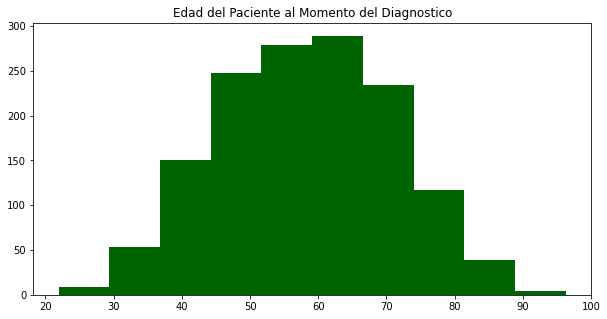

In [59]:
plt.figure(figsize=(10,5))
plt.hist(Edad,facecolor="darkgreen")
plt.title("Edad del Paciente al Momento del Diagnostico")
plt.show()

In [60]:
Promedio_Inicial=np.mean(Edad)
print(Promedio_Inicial)

58.21361911454671


#### **Gráfico Q-Q**

Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

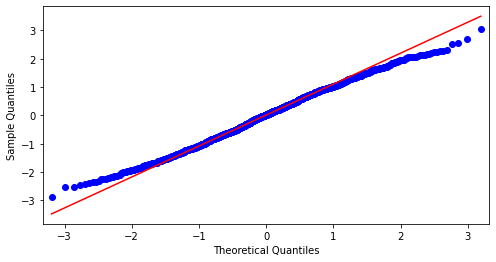

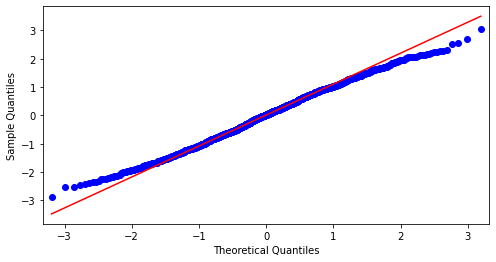

In [61]:
fig,ax=plt.subplots(figsize=(8,4)) # esquema
sm.qqplot(Edad,fit=True,line="q",ax=ax)

El análisis gráfico parece indicar que los datos siguen una distribución normal

#### **Métodos analíticos**

Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**

* H0: La edad proviene de una distribucción Normal
* Ha: La edad No proviene de una distribucción Normal

p valor; 

* p <= alfa : rechazar H0, no es normal.
* p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal

* alfa es del 5%

**Prueba de Shapiro-Wilk**

Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos

In [62]:
stat,p=shapiro(Edad)
p

0.0003340262046549469

In [63]:
if (p > 0.05):
    print("La muestra es muy probable que sea Normal")
else:
    print("No hay Normalidad")

No hay Normalidad


**Test K² de D'Agostino**
Calcula estadísticas de resumen a partir de los datos, a saber, curtosis y asimetría, para determinar si la distribución de datos se aparta de la distribución normal, llamada así por Ralph D'Agostino.

* El sesgo es una cuantificación de cuánto se empuja una distribución hacia la izquierda o hacia la derecha, una medida de asimetría en la distribución.
* La curtosis cuantifica qué parte de la distribución hay en la cola. Es una prueba estadística simple y de uso común para la normalidad.

In [64]:
stat, p = normaltest(Edad)
'{:f}'.format(p)

'0.000001'

* No hay Normalidad

### **Consecuencias de la falta de normalidad**

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

* Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

* Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

* Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

### **Detectar Datos Atípicos**

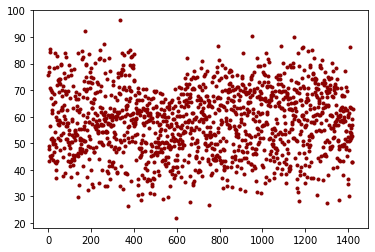

In [65]:
plt.plot(Edad,".",color="darkred")
plt.show()

**Boxplot**

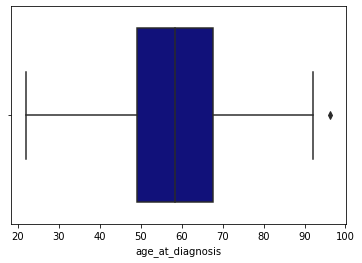

In [66]:
sns.boxplot(x=Edad,color="darkblue")

## **Análisis Bivariado** 

Puede ayudar a determinar en qué medida es posible relacionar el valor de una variable en el caso en que conozcamos el valor de otra variable

### **Numérica vs Numérica**

Correlación: Edad del DIagnostico vs Meses de Supervivencia

**Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

* 1: correlación lineal positiva total.
* 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
* -1: correlación lineal negativa total

In [67]:
df.columns

Index(['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type',
       'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage'],
      dtype='object')

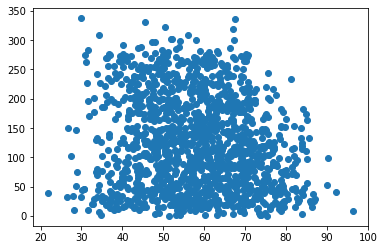

In [68]:
plt.scatter(df["age_at_diagnosis"],df['overall_survival_months'])
plt.show()

In [69]:
from scipy.stats import pearsonr

In [70]:
pearsonr(df["age_at_diagnosis"],df['overall_survival_months'])[0]

-0.14882923105239276

* Parece que no hay una relacion lineal 

**Tamaño del Tumor vs Meses de Supervivencia**

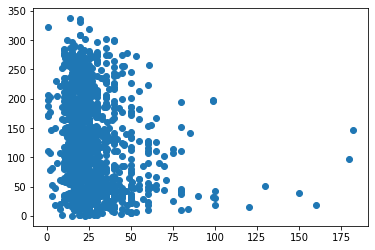

In [71]:
plt.scatter(df["tumor_size"],df['overall_survival_months'])
plt.show()

In [72]:
pearsonr(df["tumor_size"],df['overall_survival_months'])[0]

-0.19794320664678686

* Parace que no hay una relacion lineal entre las variables

**Edad de Diagnostico vs Tamaño del Tumor**

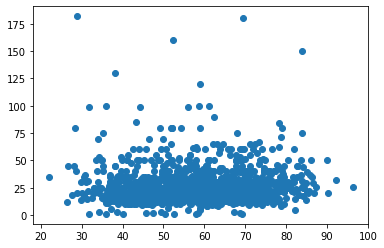

In [73]:
plt.scatter(df['age_at_diagnosis'],df["tumor_size"])
plt.show()

In [74]:
pearsonr(df['age_at_diagnosis'],df["tumor_size"])[0]

0.04229215919691178

**Matrix de correlacion**

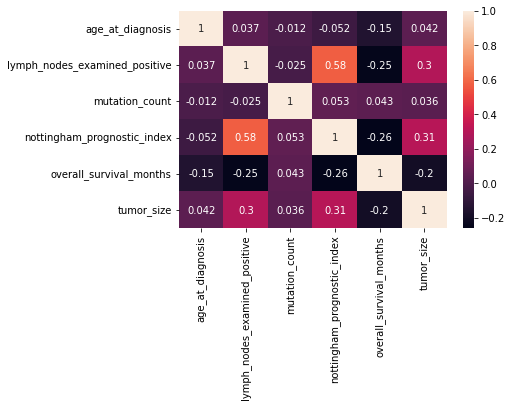

In [75]:
# taking all rows but only 6 columns
df_small = df

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

### **Categorica vs Numerica**

**Supervivencia vs Meses de Supervivencia**

ANOVA El Análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetro

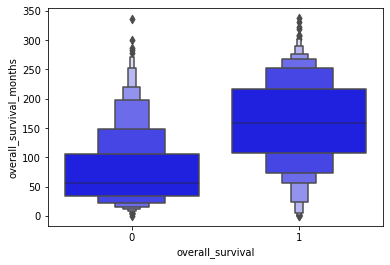

In [76]:
# grafico Cajas y Bigotes, Boxplot
sns.boxenplot(x=df['overall_survival'],y=df['overall_survival_months'],data=df,color="blue")
plt.show()

In [77]:
grupo=df[['overall_survival','overall_survival_months']].groupby('overall_survival')

**Test Estadistico**

In [78]:
from  scipy import stats
f_val,p=stats.f_oneway(grupo.get_group(1)['overall_survival_months'],grupo.get_group(0)['overall_survival'])

In [79]:
'{:f}'.format(p)

'0.000000'

Test:
* H0: Los Grupos No estan relacionados
* Ha: Los grupoes estan Relacionados

* si P valro es Menor a 0.05, Los Grupos probablemente estan relacionados

**Supervivencia vs Edad de Diagnostico**

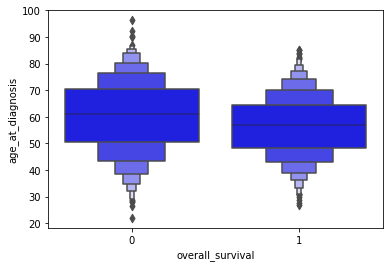

In [80]:
# grafico Cajas y Bigotes, Boxplot
sns.boxenplot(x=df['overall_survival'],y=df[ 'age_at_diagnosis'],data=df,color="blue")
plt.show()

In [81]:
grupo=df[['overall_survival','age_at_diagnosis']].groupby('overall_survival')
f_val,p=stats.f_oneway(grupo.get_group(1)['age_at_diagnosis'],grupo.get_group(0)['overall_survival'])
'{:f}'.format(p)

'0.000000'

* si P valro es Menor a 0.05, Los Grupos probablemente estan relacionado

**Supervivencia vs Tamaño del Tumor**

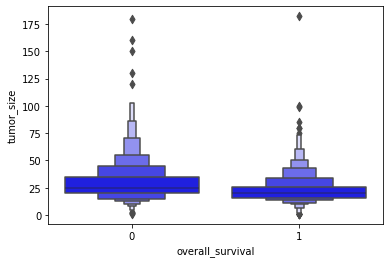

In [82]:
sns.boxenplot(x=df['overall_survival'],y=df['tumor_size'],data=df,color="blue")
plt.show()

In [83]:
grupo=df[['overall_survival','tumor_size']].groupby('overall_survival')
f_val,p=stats.f_oneway(grupo.get_group(1)['tumor_size'],grupo.get_group(0)['overall_survival'])
'{:f}'.format(p)

'0.000000'

* si P valro es Menor a 0.05, Los Grupos probablemente estan relacionado

### **Categorica vs Categorica**

**Supervivencia vs Quimioterapia**

In [84]:
tc=pd.crosstab(index=df['overall_survival'],columns=df['chemotherapy'])
print(tc)

chemotherapy        0    1
overall_survival          
0                 433  189
1                 617  184


In [85]:
c,p,pchi, test=chi2_contingency(tc)
'{:f}'.format(p)

'0.001976'

h0: las variables son Indepedientes

Ha: las variables son dependientes

si p valor es meonor a 0.05, Las Variables estan relacionadas estadisticamente, por lo tanto para un posible modelo, deben incluirse

# **4) Modelación**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

*  Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datos

<img src="https://d33wubrfki0l68.cloudfront.net/478f2689f1b9903ce2feed61a1f5e9c9deb2bcc9/55b03/post/commentary/inference-vs-prediction_files/figure-html/unnamed-chunk-1-1.png" width=500>

**Flujos de trabajo para inferencia y predicción**

Los flujos de trabajo básicos para la inferencia y la predicción se describen en las siguientes secciones.

**Inferencia**
* Modelado: Razonar sobre el proceso de generación de datos y elegir el modelo estocástico que mejor se aproxime al proceso de generación de datos.
* Validación del modelo: evalúe la validez del modelo estocástico mediante análisis de residuos o pruebas de bondad de ajuste.
* Inferencia: utilice el modelo estocástico para comprender el proceso de generación de datos.

**Predicción**

* Modelado: considere varios modelos diferentes y diferentes configuraciones de parámetros.
* Selección de modelo: identifique el modelo con el mayor rendimiento predictivo utilizando conjuntos de validación / prueba; seleccione el modelo con el rendimiento más alto en el equipo de prueba.
* Predicción: aplique el modelo seleccionado en datos nuevos con la expectativa de que el modelo seleccionado también se generalice a los datos no vistos.

## **Selección de variables**

**Variables Categóricas**

In [86]:
cat_columnas=df.drop(['overall_survival'],axis=1).select_dtypes(include=["category"]).columns.to_list()
cat_columnas

['type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'oncotree_code',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_stage']

**Variables Numéricas**

In [87]:
num_columnas=df._get_numeric_data().columns
print(num_columnas)

Index(['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size'],
      dtype='object')


**Función para Seleccionar las X**

Ocasionalmente se debe introducir variables categóricas (o cualitativas) con dos o más categorias. Por ejemplo, género, estado civil, partido politico. Estas se pueden representar como variables dummy o indicadoras. Estas variables toman dos valores usualmente, cero y uno. Los dos valores significan que la obervación pertenece a una de dos categorias.

Las variables dummy o indicadoras sirven para identificar categorias o clase a las que pertenecen las observaciones.
Utilizando variables ficticias (binarias o “dummy”) podemos ser capaces de medir el efecto del factor cualitativo, así como constrastar si el efecto del factor cualitativo es relevante

In [88]:
def tabla_con_variables_seleccionadas(df,num_columnas, cat_columnas):
    datos_filtro=df
    if cat_columnas != []:
        datos_filtro_dummies=pd.get_dummies(datos_filtro[cat_columnas],drop_first=True)#  elimanar la primera para modelos parametricos
        X=pd.concat([datos_filtro[num_columnas],datos_filtro_dummies],axis=1, sort=False)
    else:#  solo use las variables numéricas
        X = datos_filtro[num_columnas].apply
    return X

In [89]:
X=tabla_con_variables_seleccionadas(df,num_columnas, cat_columnas)

In [90]:
X.shape

(1423, 65)

In [91]:
X.head(4)

,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,type_of_breast_surgery_MASTECTOMY,cancer_type_Breast Sarcoma,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cellularity_Low,cellularity_Moderate,chemotherapy_1,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,pam50_+_claudin-low_subtype_NC,pam50_+_claudin-low_subtype_Normal,pam50_+_claudin-low_subtype_claudin-low,cohort_2,cohort_3,cohort_4,cohort_5,er_status_measured_by_ihc_Positve,er_status_Positive,neoplasm_histologic_grade_2,neoplasm_histologic_grade_3,her2_status_measured_by_snp6_LOSS,her2_status_measured_by_snp6_NEUTRAL,her2_status_measured_by_snp6_UNDEF,her2_status_Positive,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,hormone_therapy_1,inferred_menopausal_state_Pre,integrative_cluster_10,integrative_cluster_2,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9,primary_tumor_laterality_Right,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MDLC,pr_status_Positive,radio_therapy_1,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,tumor_stage_1,tumor_stage_2,tumor_stage_3,tumor_stage_4
0,75.65,10.0,5.0,6.044,140.500000,22.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0
1,43.19,0.0,2.0,4.020,84.633333,10.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0
2,48.87,1.0,2.0,4.030,163.700000,15.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
3,47.68,3.0,1.0,4.050,164.933333,25.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0


In [92]:
Y=df['overall_survival']

**División train y test**

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en problemas de clasificación, identificar con el argumento stratify la variable en base a la cual hacer el reparto.

Este tipo de reparto estratificado asegura que el conjunto de entrenamiento y el de test sean similares en cuanto a la variable respuesta, sin embargo, no garantiza que ocurra lo mismo con los predictores.

In [93]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1214,stratify=Y)

In [94]:
y_train.value_counts()

1    641
0    497
Name: overall_survival, dtype: int64

In [95]:
y_test.value_counts()

1    160
0    125
Name: overall_survival, dtype: int64

In [96]:
print(x_train.shape)
print(x_test.shape)

(1138, 65)
(285, 65)


## **4.1) Árboles de decisión con Python:clasificación**

**¿Qué son los árboles de decisión?**

* El enfoque classification and regression tree (CART) fue desarrollado por Breiman et al. (1984).
* Son un tipo de algoritmos de aprendizaje supervisado (i.e., existe una variable objetivo predefinida).
* Principalmente usados en problemas de clasificación.
* Las variables de entrada y salida pueden ser categóricas o continuas.
* Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.

<img src="https://bookdown.org/content/2031/images/decision_tree_explanation.png" width=500>

Se divide la población o muestra en conjuntos homegéneos basados en la variable de entrada más significativa.
La construcción del árbol sigue un enfoque de división binaria recursiva (top-down greddy approach). Greedy -> analiza la mejor variable para ramificación sólo en el proceso de división actual

**Ventajas**

* Fácil de entender
* Util en exploración de datos:identificar importancia de variables a partir de cientos de variables.
* Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado)
* El tipo de datos no es una restricción
* Es un método no paramétrico (i.e., no hay suposición acerca del espacio de distribución y la estructura del clasificador)

**Desventajas**
* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: métodos como SVM y clasificadores tipo ensamblador a menudo tienen tasas de error 30% más bajas que CART (Classification and Regression Trees)
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

**¿Cómo decide un árbol donde ramificarse?**

* La decisión de hacer divisiones estratégicas afecta altamente la precisión del árbol.
* Los criterios de decisión son diferentes para árboles de clasificación y regresión.
* Existen varios algortmos para decidir la ramificación.
* La creación de subnodos incrementa la homogeneidad de los subnodos resultantes. Es decir, la pureza del nodo se incrementa respecto a la variable objetivo.
* Se prueba la división con todas las variables y se escoge la que produce subnodos más homogéneos.
* Algunos algoritmos más comunes para la selección: Indice Gini, Chi Cuadrado, Ganancia de la información y Reducción en la varianza

**Indice Gini**

“Si seleccionamos aletoriamente dos items de una población, entonces estos deben ser de la misma clase y la probabilidad de esto es 1 si la población es pura”.

Variable objetivo categórica: “Success” o “Failure”
Solo divisiones binarias
A mayor valor de índice Gini, mayor la homogeneidad
CART (Classification and Regression Tree) usa el método de Gini para la división binaria

**Cálculo de índice Gini**

* Calcular Gini para los subnodos usando la fórmula de la suma de los cuadrados de probabilidad para success y failure (p^2 + q^2).
* Calcular Gini para la división usando score Gini ponderado para cada nodo de la división

<img src="https://bookdown.org/content/2031/images/example_tree.png" width=500>


* Mujer	(0.2)^2 + (0.8)^2 = 0.68  , IX	(0.43)^2 +(0.57)^2 = 0.51
* Hombre	(0.65)^2 + (0.35)^2 = 0.55, 	X	(0.56)^2 +(0.44)^2 = 0.51
* Pond.	(10/30)0.68 + (20/30)0.55 = 0.59, 	Pond.	(14/30)0.51 + (16/30)0.51 = 0.51

In [97]:
#!pip install --upgrade scikit-learn

In [98]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV
# evaluar modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import precision_recall_fscore_support as score

**Creamos la funcion o modelo**

In [99]:
Modelo1=DecisionTreeClassifier( max_depth=5,criterion = 'gini',random_state= 123) # profundidad hiperparametro a optimizar
Modelo1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

**Grafico**

Profundidad del árbol: 5
Número de nodos terminales: 24


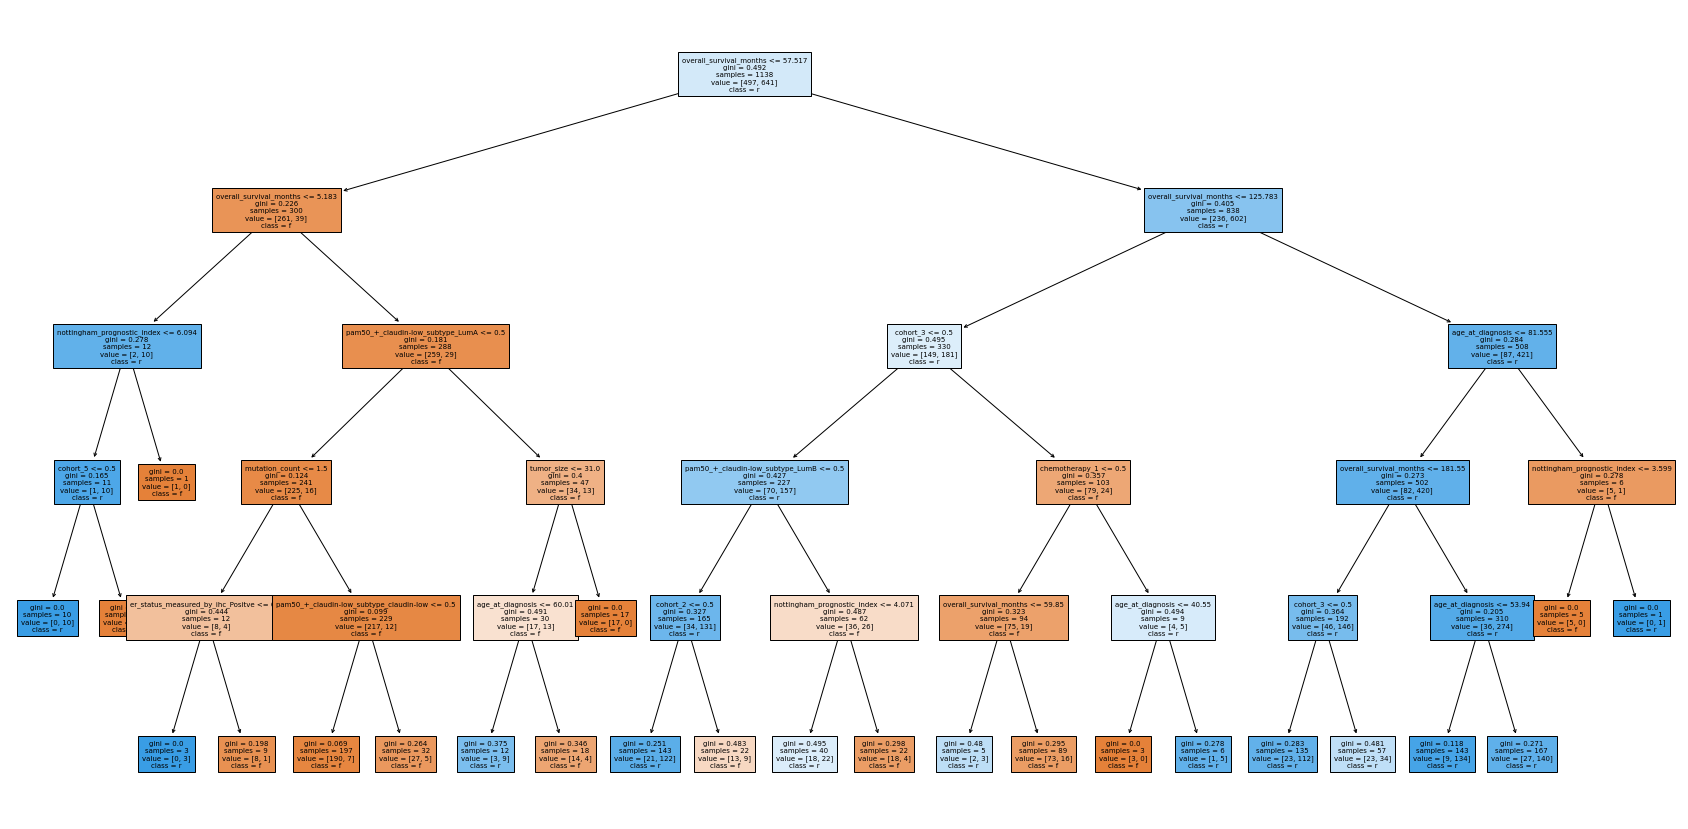

In [100]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {Modelo1.get_depth()}")
print(f"Número de nodos terminales: {Modelo1.get_n_leaves()}")
plot=plot_tree(decision_tree=Modelo1,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

### **Predicción y evaluación del modelo**

In [101]:
predicciones_train=Modelo1.predict(X=x_train)
predicciones_train

array([0, 1, 1, ..., 1, 1, 0])

In [102]:
predicciones_test=Modelo1.predict(X=x_test)

In [103]:
# train
metrics.accuracy_score(y_train,predicciones_train)

0.8479789103690686

In [104]:
# test
Accuracy_AD_VS_DD=metrics.accuracy_score(y_test,predicciones_test)
print(Accuracy_AD_VS_DD)

0.7614035087719299


In [105]:
# matrix confusion
metrics.confusion_matrix(y_test,predicciones_test)

array([[ 75,  50],
       [ 18, 142]])

In [106]:
y_test.value_counts()

1    160
0    125
Name: overall_survival, dtype: int64

In [107]:
Reporte_AD_VS_DD=metrics.classification_report(y_test,predicciones_test)

print(Reporte_AD_VS_DD)

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       125
           1       0.74      0.89      0.81       160

    accuracy                           0.76       285
   macro avg       0.77      0.74      0.75       285
weighted avg       0.77      0.76      0.75       285



In [108]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]
print(f1_Score_AD_0)
print(f1_Score_AD_1)

0.6880733944954128
0.8068181818181819


### **Podando del árbol (pruning)**

**Criterio de costo de complejidad - Cost complexity criterion**

Para encontrar el balance entre la profundidad y complejidad del árbol con respecto a la capacidad predictiva del modelo en datos de test, normalmente se hace crecer el árbol de decisión hasta su mayor extensión y luego se ejecuta el proceso de poda para identificar el subárbol óptimo.

Se encuentra el subárbol óptimo usando el parámetro de costo de complejidad ( 
α
 ) que penaliza la función objetivo abajo para el número de nodos hoja en el árbol (T)
 
 $$
\mathrm{Err}_\alpha(f) = \sum_{t=1}^{T}\mathrm{Err}_t(f)  + \alpha|f|,\quad \alpha\geq 0,
$$

* Para un valor dado de  α se encuentra el árbol podado más pequeño (número de nodos hoja) que tiene el error más bajo de penalización. 
* Se evalúan múltiples moodelos a través de un espectro de   α y se usa validación cruzada para identificar el   α óptimo, y por lo tanto el subárbol óptimo

	* $\alpha\to0\ \: \Rightarrow$ a large tree (i.e. $\alpha=0\Rightarrow f_0$).
	* $\alpha\to\infty\Rightarrow$ a very small tree.

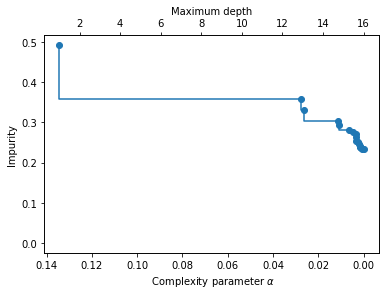

In [109]:
f=Modelo1
f.get_n_leaves() # number of leaves of the tree
f.get_depth()    # depth of the tree

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(alphas, impurs, marker='o', drawstyle='steps-post')
ax.invert_xaxis()
plt.xlabel(r' Complexity parameter $\alpha$')
plt.ylabel('Impurity')
ax1 = ax.twiny()
#plt.plot(nodes, alphas, marker='o', drawstyle='steps-post', color='w')
#plt.xlabel('No. of terminal nodes')
plt.plot(depth, alphas, marker='o', drawstyle="steps-post", color='w')
plt.xlabel('Maximum depth')
plt.show()


results = {'alpha': alphas, 'Imputiry': impurs, 'Nodes': nodes, 'Depth': depth}
results = pd.DataFrame(results, columns = ['alpha', 'Imputiry', 'Nodes', 'Depth'])

**Accuracy vs alpha para training y testing**

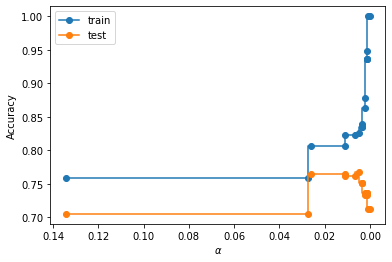

In [110]:
train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

#### **Validacion Cruzada**

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [112]:
f = DecisionTreeClassifier(random_state=77)
max_depth = range(1, 8, 1)
min_samples_leaf = range(1, 10, 1)
param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(x_train, y_train)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.806761 using {'max_depth': 3, 'min_samples_leaf': 5}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 1}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 2}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 3}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 4}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 5}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 6}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 7}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 8}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 9}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 1}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 2}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 3}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 4}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 5}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 6}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 7}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 8}
0.75

**Pruned tree**

In [113]:
f = DecisionTreeClassifier(
                           criterion='gini',    # 'gini' or 'entropy' impurity functions
                          max_depth=7,         # maximum depth of the tree
#                          min_samples_split=2, # minimum number of samples required to split an internal node
#                          min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           ccp_alpha=0.000,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

print(f)
print('Depth:', f.get_depth())            # depth of the tree
print('No. of leaves:', f.get_n_leaves()) # number of leaves of the tree

# rules of the decision tree
feature_names = list(x_train.columns) # features' names to plot the tree
ft = export_text(f, feature_names=feature_names)
#print(ft)

DecisionTreeClassifier(max_depth=7, random_state=77)
Depth: 7
No. of leaves: 64


**Tree plot**

Profundidad del árbol: 7
Número de nodos terminales: 64


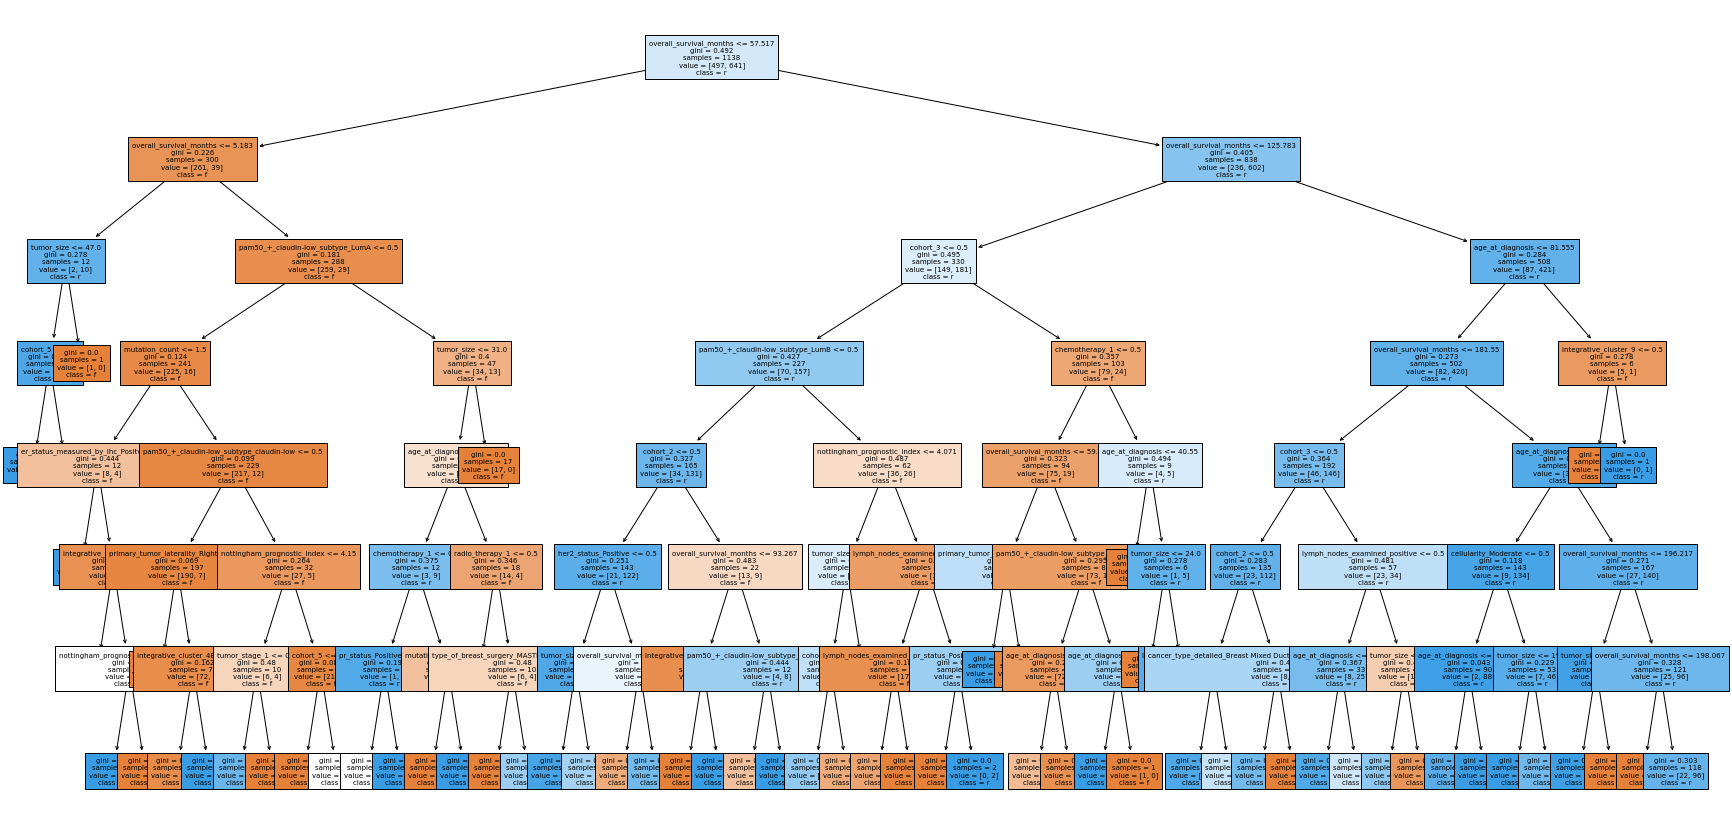

In [114]:
ig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {f.get_depth()}")
print(f"Número de nodos terminales: {f.get_n_leaves()}")
plot=plot_tree(decision_tree=f,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

**Evaluamos Prediccion**

In [115]:
predicciones_train=f.predict(X=x_train)
predicciones_train

array([1, 1, 1, ..., 1, 1, 0])

In [116]:
predicciones_test=f.predict(X=x_test)
predicciones_test

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [117]:
Accuray_train_Optimo=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_Optimo=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_Optimo)
print(Accuray_test_Optimo)

0.8936731107205624
0.7649122807017544


In [118]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD1_0=fscore[0]
f1_Score_AD1_1=fscore[1]

In [119]:
Reporte_AD_Optimo=metrics.classification_report(y_test,predicciones_test)
print(Reporte_AD_Optimo)

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       125
           1       0.77      0.84      0.80       160

    accuracy                           0.76       285
   macro avg       0.76      0.75      0.76       285
weighted avg       0.76      0.76      0.76       285



In [120]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': f.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,overall_survival_months,0.574280
22,cohort_3,0.091871
5,tumor_size,0.049420
0,age_at_diagnosis,0.049163
17,pam50_+_claudin-low_subtype_LumB,0.034011
21,cohort_2,0.032021
1,lymph_nodes_examined_positive,0.022410
3,nottingham_prognostic_index,0.017686
16,pam50_+_claudin-low_subtype_LumA,0.016519
32,her2_status_Positive,0.010876


## **4.2) Random Forest**

El término ensamblador significa grupo. Los métodos tipo ensamblador están formados de un grupo de modelos predictivos que permiten alcanzar una mejor precisión y estabilidad del modelo. Estos proveen una mejora significativa a los modelos de árboles de decisión.

¿Por qué surgen los ensambladores de árboles?

* Así como todos los modelos, un árbol de decisión también sufre de los problemas de sesgo y varianza. Es decir, ‘cuánto en promedio son los valores predecidos diferentes de los valores reales’ (sesgo) y ‘cuan diferentes serán las predicciones de un modelo en un mismo punto si muestras diferentes se tomaran de la misma población’ (varianza).

* Al construir un árbol pequeño se obtendrá un modelo con baja varianza y alto sesgo. Normalmente, al incrementar la complejidad del modelo, se verá una reducción en el error de predicción debido a un sesgo más bajo en el modelo. En un punto el modelo será muy complejo y se producirá un sobre-ajuste del modelo el cual empezará a sufrir de varianza alta.

* El modelo óptimo debería mantener un balance entre estos dos tipos de errores. A esto se le conoce como “trade-off” (equilibrio) entre errores de sesgo y varianza. El uso de ensambladores es una forma de aplicar este “trade-off”.

<img src="https://bookdown.org/content/2031/images/trade_off.jpg" width=500>

* Ensambladores comunes: Bagging, Boosting and Stacking. Random Forest es del primer tipo

**¿Qué es el proceso de bagging y cómo funciona?**

Bagging es una técnica usada para reducir la varianza de las predicciones a través de la combinación de los resultados de varios clasificadores, cada uno de ellos modelados con diferentes subconjuntos tomados de la misma población.

<img src="https://bookdown.org/content/2031/images/bootstraping.png" width=500>


**En resumen:**
* Crear múltiples subconjuntos de datos
* Construir múltiples modelos
* Combinar los modelos.

**Random Forest**

Random Forest se considera como la “panacea” en todos los problemas de ciencia de datos.
Util para regresión y clasificación.
Un grupo de modelos “débiles”, se combinan en un modelo robusto.
Sirve como una técnica para reducción de la dimensionalidad.
Se generan múltiples árboles (a diferencia de CART).
Cada árbol da una classificación (vota por una clase). Y el resultado es la clase con mayor número de votos en todo el bosque (forest).
Para regresión, se toma el promedio de las salidas (predicciones) de todos los árboles.

**¿Cómo se construye un modelo random forest?**

Cada árbol se construye así:

* Dado que el número de casos en el conjunto de entrenamiento es N. Una muestra de esos N casos se toma aleatoriamente pero CON REEMPLAZO. Esta muestra será el conjunto de entrenamiento para construir el árbol i.

* Si existen M varibles de entrada, un número m<M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque.

* Cada árbol crece hasta su máxima extensión posible y NO hay proceso de poda.
Nuevas instancias se predicen a partir de la agregación de las predicciones de los x árboles (i.e., mayoría de votos para clasificación, promedio para regresión)


**Out of bag samples y out of bag error**

* El proceso de muestreo de los datos con reemplazo se denomina bootstrap.
* Un tercio de los datos no se usan para el entrenamiento y pueden ser usados para test.
* Este conjunto se denomina out of bag (OOB )samples.

<img src="https://bookdown.org/content/2031/images/bootstrap_concept.png" width=500>

* El error estimado en estos out of bag samples se conoce como out of bag error (OOB error)
* Usar este conjunto de test (OOB) es tan preciso como si se usara un conjunto de test del mismo tamaño que el de entrenamiento.
* Sería posible no usar un conjunto de test adicional


<img src="https://bookdown.org/content/2031/images/OOB_diagram.png" width=500>

**Ventajas de Random Forest**

* Existen muy pocas suposiciones y por lo tanto la preparación de los datos es mínima.
* Puede manejar hasta miles de variables de entrada e identificar las más significativas. Método de reducción de dimensionalidad.
* Una de las salidas del modelo es la importancia de variables.
* Incorpora métodos efectivos para estimar valores faltantes.
* Es posible usarlo como método no supervisado (clustering) y detección de outliers.

**Desventajas de Random Forest**

* Pérdida de interpretación
* Bueno para clasificación, no tanto para regresión. Las predicciones no son de naturaleza continua.
* En regresión, no puede predecir más allá del rango de valores del conjunto de entrenamiento.
* Poco control en lo que hace el modelo (modelo caja negra para modeladores estadísticos)

In [121]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           #
                           n_estimators=100, ################################### Cuantos Arboles?
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                           )

f = f.fit(x_train, y_train)
f

RandomForestClassifier(min_samples_split=3, random_state=77)

**Evaluación del Modelo**

In [122]:
predicciones_train=f.predict(X=x_train)
predicciones_test=f.predict(X=x_test)

Accuray_train_RF=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF)
print(Accuray_test_RF)

1.0
0.7894736842105263


In [123]:
Reporte_RF=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF)

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       125
           1       0.77      0.88      0.82       160

    accuracy                           0.79       285
   macro avg       0.80      0.78      0.78       285
weighted avg       0.79      0.79      0.79       285



In [124]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]
print(f1_Score_RF_0)
print(f1_Score_RF_1)

0.736842105263158
0.8245614035087718


### **Optimización de Hiperparametros**

In [125]:
from sklearn.model_selection import GridSearchCV, KFold

# define grid search
B = 10 # Costo computacional, recomiendo mas 50
b = range(1, B + 1)


grid = dict(n_estimators=b)
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=f, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)



# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.775071 using {'n_estimators': 9}
0.683697 with: {'n_estimators': 1}
0.670512 with: {'n_estimators': 2}
0.711817 with: {'n_estimators': 3}
0.722347 with: {'n_estimators': 4}
0.742542 with: {'n_estimators': 5}
0.750444 with: {'n_estimators': 6}
0.765415 with: {'n_estimators': 7}
0.770686 with: {'n_estimators': 8}
0.775071 with: {'n_estimators': 9}
0.766288 with: {'n_estimators': 10}


In [126]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           #                       
                           n_estimators=6,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=True,
                           random_state=77
                          )

oob_error   = []
train_error = []
test_error  = []
for b in range(1, B + 1):
    f.set_params(n_estimators = b)
    f.fit(x_train, y_train)
    # errors
    oob_error.append(1 - f.oob_score_)
    train_error.append(1 - f.score(x_train, y_train))
    test_error.append(1 - f.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

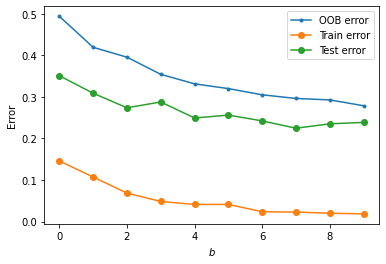

In [127]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel(r'$b$')
ax.set_ylabel('Error')
ax.plot(oob_error, marker='.', label='OOB error')
ax.plot(train_error, marker='o', label='Train error')
ax.plot(test_error, marker='o', label='Test error')
ax.legend()
plt.show()

**Random Forest Optimo**

In [128]:
import numpy as np

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=6, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           #                       
                           n_estimators=6,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

In [129]:
# ------------------------------------------------------------------------------
modelo_final = f   #grid_result.best_estimator_
modelo_final 

RandomForestClassifier(min_samples_split=6, n_estimators=6, random_state=77)

In [130]:
predicciones_train=modelo_final.predict(X=x_train)
predicciones_test=modelo_final.predict(X=x_test)

Accuray_train_RF_O=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF_O=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF_O)
print(Accuray_test_RF_O)

0.9314586994727593
0.7824561403508772


In [131]:
Reporte_RF_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF_O)

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       125
           1       0.78      0.86      0.82       160

    accuracy                           0.78       285
   macro avg       0.78      0.77      0.77       285
weighted avg       0.78      0.78      0.78       285



In [132]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF1_0=fscore[0]
f1_Score_RF1_1=fscore[1]
print(f1_Score_RF1_0)
print(f1_Score_RF1_1)

0.7327586206896552
0.8165680473372781


**Importancia de Variables**

overall_survival_months                           0.258702
tumor_size                                        0.094055
nottingham_prognostic_index                       0.089531
lymph_nodes_examined_positive                     0.053976
age_at_diagnosis                                  0.048689
mutation_count                                    0.040317
cohort_3                                          0.030034
3-gene_classifier_subtype_ER+/HER2- Low Prolif    0.020631
tumor_stage_1                                     0.017599
pam50_+_claudin-low_subtype_LumA                  0.016846
primary_tumor_laterality_Right                    0.015175
cellularity_Moderate                              0.015099
pr_status_Positive                                0.011571
type_of_breast_surgery_MASTECTOMY                 0.011172
radio_therapy_1                                   0.010612
dtype: float64


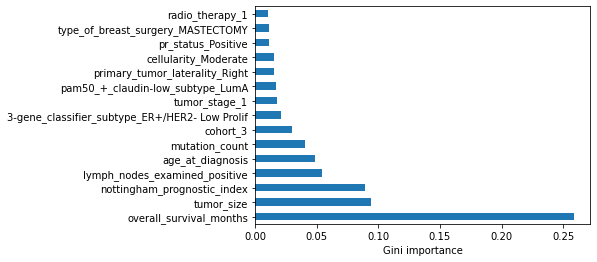

In [133]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(modelo_final.feature_importances_, index=x_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(15))

feat_importances.nlargest(15).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini importance')
#plt.ylabel('Feature')
plt.show()

## **4.3) Boosting**

### **A) Gradient Boosting**


Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Ventajas

Son capaces de seleccionar predictores de forma automática.

Pueden aplicarse a problemas de regresión y clasificación.

Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.

Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.

Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización).

No se ven muy influenciados por outliers.

Si para alguna observación, el valor de un predictor no está disponible, a pesar de no poder llegar a ningún nodo terminal, se puede conseguir una predicción empleando todas las observaciones que pertenecen al último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.

Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.

Tienen buena escalabilidad, pueden aplicarse a conjuntos de datos con un elevado número de observaciones.

Desventajas

Al combinar múltiples árboles, se pierde la interpretabilidad que tienen los modelos basados en un único árbol.

Cuando tratan con predictores continuos, pierden parte de su información al categorizarlas en el momento de la división de los nodos.

Tal y como se describe más adelante, la creación de las ramificaciones de los árboles se consigue mediante el algoritmo de recursive binary splitting. Este algoritmo identifica y evalúa las posibles divisiones de cada predictor acorde a una determinada medida (RSS, Gini, entropía…). Los predictores continuos o predictores cualitativos con muchos niveles tienen mayor probabilidad de contener, solo por azar, algún punto de corte óptimo, por lo que suelen verse favorecidos en la creación de los árboles.

No son capaces de extrapolar fuera del rango de los predictores observado en los datos de entrenamiento.

**A) Modelo Gradient Boosting**
* Es un método de machine learning de mayor éxito.

* Gradient boosting with a $\ell_2$ loss function is known as $\ell_2$Boost
* Gradient boosting with a log-loss function is known as LogitBoost
* Gradient boosting with a exp-loss function is known as AdaBoost

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
Modelo_GBC=GradientBoostingClassifier( max_depth=7,
                                      loss="deviance",
                                      n_estimators=20, # Recomiendo
                                      learning_rate=1.0,
                                      random_state=77# semilla 
                                     )

Modelo_GBC.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=7, n_estimators=20,
                           random_state=77)

**Poder de Prediccion**

In [135]:
predicciones_train=Modelo_GBC.predict(X=x_train)
predicciones_test=Modelo_GBC.predict(X=x_test)
Accuray_train_GBC=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_GBC=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_GBC)
print(Accuray_test_GBC)

1.0
0.7614035087719299


In [136]:
Reporte_GBC_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_GBC_O)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       125
           1       0.79      0.79      0.79       160

    accuracy                           0.76       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.76      0.76      0.76       285



In [137]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_B_0=fscore[0]
f1_Score_B_1=fscore[1]
print(f1_Score_B_0)
print(f1_Score_B_1)

0.728
0.7875



## **4.4) Logit (Inferencia)**

**Modelo lineal generalizado**

En estadística, el modelo lineal generalizado (GLM) es una generalización flexible de la regresión lineal ordinaria que permite variables de respuesta que tienen modelos de distribución de errores distintos de una distribución normal. El GLM generaliza la regresión lineal al permitir que el modelo lineal esté relacionado con la variable de respuesta a través de una función de enlace y al permitir que la magnitud de la varianza de cada medición sea una función de su valor predicho.

John Nelder y Robert Wedderburn formularon modelos lineales generalizados como una forma de unificar otros modelos estadísticos, como la regresión lineal, la regresión logística y la regresión de Poisson. Propusieron un método de mínimos cuadrados iterativamente ponderados para la estimación de máxima verosimilitud de los parámetros del modelo. La estimación de máxima verosimilitud sigue siendo popular y es el método predeterminado en muchos paquetes de computación estadística


In [138]:
def tabla_con_variables_seleccionadas1(df,num_columnas, cat_columnas):
    datos_filtro=df
    if cat_columnas != []:
        datos_filtro_dummies=pd.get_dummies(datos_filtro[cat_columnas], drop_first=True)# drop_first=True elimanar la primera para modelos parametricos
        X=pd.concat([datos_filtro[num_columnas],datos_filtro_dummies],axis=1, sort=False)
    else:#  solo use las variables numéricas
        X = datos_filtro[num_columnas].apply
    return X

In [139]:
X=tabla_con_variables_seleccionadas1(df,num_columnas, cat_columnas)
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1234,stratify=Y)

In [140]:
import statsmodels.api as sm # statsmodels Seres Tiempo
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [141]:
x_train_1=sm.add_constant(x_train,prepend=True)
x_test_1=sm.add_constant(x_test,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Modelo Logit**

In [142]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)

**Selección de Variables**

Selección univariante Las pruebas estadísticas se pueden utilizar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida. La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

In [143]:
(x_train.shape)

(1138, 65)

In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [145]:
pd.set_option('display.float_format','{:.2f}'.format)
Mejores_Variables=SelectKBest(score_func=chi2,k=56)
fit=Mejores_Variables.fit(x_train,y_train)
df_puntajes=pd.DataFrame(fit.scores_)
df_Columnas=pd.DataFrame(x_train.columns)
df_completo=pd.concat([df_Columnas,df_puntajes],axis=1)
df_completo.columns=["Variable","Puntaje"]
#################################################### Seleccion 10 Variables ######################
td=df_completo.nlargest(10,"Puntaje")
td

,Variable,Puntaje
4,overall_survival_months,14699.69
1,lymph_nodes_examined_positive,531.62
5,tumor_size,497.61
0,age_at_diagnosis,69.95
58,3-gene_classifier_subtype_ER+/HER2- Low Prolif,28.56
3,nottingham_prognostic_index,25.89
16,pam50_+_claudin-low_subtype_LumA,24.62
43,integrative_cluster_3,21.99
61,tumor_stage_1,21.82
22,cohort_3,21.31


In [146]:
Variables=td["Variable"].values
Variables

array(['overall_survival_months', 'lymph_nodes_examined_positive',
       'tumor_size', 'age_at_diagnosis',
       '3-gene_classifier_subtype_ER+/HER2- Low Prolif',
       'nottingham_prognostic_index', 'pam50_+_claudin-low_subtype_LumA',
       'integrative_cluster_3', 'tumor_stage_1', 'cohort_3'], dtype=object)

In [147]:
x_train_Seleccion_V=x_train[Variables]
x_test_Seleccion_V=x_test[Variables]

In [148]:
x_train_1=sm.add_constant(x_train_Seleccion_V,prepend=True)
x_test_1=sm.add_constant(x_test_Seleccion_V,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [149]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)
Modelo_Logit=Modelo_Logit.fit()# method='bfgs

Optimization terminated successfully.
         Current function value: 0.470043
         Iterations 6


In [150]:
print(Modelo_Logit.summary2())

                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.314     
Dependent Variable:            overall_survival          AIC:                       1091.8184 
Date:                          2022-03-29 03:33          BIC:                       1147.2257 
No. Observations:              1138                      Log-Likelihood:            -534.91   
Df Model:                      10                        LL-Null:                   -779.67   
Df Residuals:                  1127                      LLR p-value:               7.6772e-99
Converged:                     1.0000                    Scale:                     1.0000    
No. Iterations:                6.0000                                                         
----------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.    z    P>|z|   [0.025  0.

**Evaluación**

In [151]:
Probabilidad_test=Modelo_Logit.predict(exog=x_test_1)
Predicciones_test=np.where(Probabilidad_test < 0.5,0,1)
Accuracy_Log_test=metrics.accuracy_score(y_test,Predicciones_test)
print(Accuracy_Log_test)
Reporte_Log_test=metrics.classification_report(y_test,Predicciones_test)
print(Reporte_Log_test)
precision, recall, fscore, support = score(y_test,Predicciones_test)
f1_Score_Log1_0=fscore[0]
f1_Score_Log1_1=fscore[1]
print(f1_Score_Log1_0)
print(f1_Score_Log1_1)

0.8035087719298246
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       125
           1       0.83      0.81      0.82       160

    accuracy                           0.80       285
   macro avg       0.80      0.80      0.80       285
weighted avg       0.80      0.80      0.80       285

0.7795275590551182
0.8227848101265822


# **5) Evaluación de Modelos**

In [152]:
df_comparacion_Modelos=pd.DataFrame({
    "Modelos":["Árbol de decisión","Arbol Optimizado","RandomForest","RandomForestOptimo","GradientBoosting","RegresionLogistica"],
    "Accuracy":[Accuracy_AD_VS_DD,Accuray_test_Optimo,Accuray_test_RF,Accuray_test_RF_O,Accuray_test_GBC,Accuracy_Log_test],
    "f1_0":[f1_Score_AD_0,f1_Score_AD1_0,f1_Score_RF_0,f1_Score_RF1_0,f1_Score_B_0,f1_Score_Log1_0],
    "f1_1":[f1_Score_AD_1,f1_Score_AD1_1,f1_Score_RF_1,f1_Score_RF1_1,f1_Score_B_1,f1_Score_Log1_1]})
df_comparacion_Modelos.sort_values("Accuracy",ascending=False)

,Modelos,Accuracy,f1_0,f1_1
5,RegresionLogistica,0.80,0.78,0.82
2,RandomForest,0.79,0.74,0.82
3,RandomForestOptimo,0.78,0.73,0.82
1,Arbol Optimizado,0.76,0.71,0.80
0,Árbol de decisión,0.76,0.69,0.81
4,GradientBoosting,0.76,0.73,0.79


* El mejor modelo es Regresion Logistica